## Importing all required librabies for Predicition

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('breast_cancer.csv')  #To read the csv file
df.head() #To see the first five records.

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,0.765942,1.346009,0.762097,1.814917,3.044459,3.188300,1.668963,2.512714,-3.971836,-0.221033,...,1.236292,2.629122,-1.663193,-0.296061,-4.946258,-0.790670,2.138308,0.078932,-2.521396,Benign
1,-0.056868,-1.001879,-0.658901,-0.867818,2.724429,-2.887548,-1.433350,-2.558974,2.630906,0.831842,...,0.035325,1.526090,1.236800,-3.440604,3.874332,0.282501,0.269003,0.870939,2.269517,Benign
2,1.392771,-1.030723,0.240743,-0.953795,-3.717261,1.711806,0.291977,0.579635,-3.014146,-0.150114,...,1.917824,-2.218128,-3.387880,1.149443,-2.718049,1.639728,0.340241,0.410500,-1.919519,Benign
3,-9.083023,0.341213,-0.335057,-0.446504,5.209697,0.424702,0.469633,-2.868001,0.602443,-0.138496,...,1.283740,4.935191,4.536487,2.897155,-0.785938,-1.296861,0.051928,-0.418081,-0.382346,Malignant
4,-0.013144,-0.874087,0.580217,-0.485929,-1.816818,0.515960,1.123454,-0.723034,-1.193299,0.860306,...,3.097443,-2.133194,-0.023331,-1.462209,0.272868,-0.132149,0.274037,0.940766,0.797135,Malignant


In [5]:
df.info() #To get information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11000 non-null  float64
 1   mean_radius              11000 non-null  float64
 2   mean_texture             11000 non-null  float64
 3   mean_perimeter           11000 non-null  float64
 4   mean_area                11000 non-null  float64
 5   mean_smoothness          11000 non-null  float64
 6   mean_compactness         11000 non-null  float64
 7   mean_concavity           11000 non-null  float64
 8   mean_concave_points      11000 non-null  float64
 9   mean_symmetry            11000 non-null  float64
 10  mean_fractal_dimension   11000 non-null  float64
 11  radius_error             11000 non-null  float64
 12  texture_error            11000 non-null  float64
 13  perimeter_error          11000 non-null  float64
 14  area_error            

In [13]:
df.describe() #To gives the statistical summary of the dataset of numerical columns.

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,...,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,-0.516451,-0.012193,0.002747,-0.017810,-0.412176,0.618455,-0.010421,-0.002793,0.413540,0.011112,...,-0.005749,0.000214,-0.000102,0.001165,0.391959,-0.500803,-0.006374,-0.008174,0.016303,-0.404098
std,2.677717,0.991801,1.010911,0.997537,3.656110,1.944205,0.989491,2.016992,2.034878,0.995689,...,1.002787,0.996765,2.129183,2.088942,1.913977,3.110062,1.005520,1.001705,0.991434,1.936698
min,-12.379339,-4.404214,-3.792422,-3.841796,-15.714242,-6.491583,-4.003598,-8.143957,-8.067457,-3.571840,...,-4.066894,-4.413886,-8.020181,-8.731808,-7.373514,-11.396757,-3.814205,-3.999332,-3.744778,-7.857502
25%,-1.962709,-0.687194,-0.659381,-0.684352,-2.800786,-0.691800,-0.671661,-1.328633,-0.842287,-0.651231,...,-0.682858,-0.673322,-1.422107,-1.340517,-0.834047,-2.617501,-0.694808,-0.683426,-0.652861,-1.719588
50%,-0.326851,-0.025500,0.004581,-0.020353,-0.414054,0.646579,-0.013989,0.078721,0.534527,0.017976,...,-0.017896,-0.001384,0.080112,0.128130,0.464983,-0.724172,-0.013430,-0.004126,0.023000,-0.383049
75%,1.044692,0.657181,0.682152,0.651758,1.858333,1.934777,0.650326,1.406593,1.791466,0.665499,...,0.660828,0.671903,1.472094,1.444797,1.681216,1.473796,0.678068,0.661733,0.689102,0.917108
max,12.789756,3.656967,4.562115,3.676923,16.631042,8.380981,3.678191,7.939487,9.666932,3.467730,...,4.219366,3.619986,7.493297,6.905962,7.127094,12.198410,3.637076,3.782188,3.863906,5.885995


In [23]:
df.columns

Index(['id', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

## Column names and descriptions

  id                  :         A unique identifier for each patient
diagnosi             s: Whether the diagnosis is malignant (M) or benign (B)
radius_me           an: Mean of distances from center to points on the perimeter
texture_m          ean: Standard deviation of gray-scale values
perimeter_        mean: Perimeter of the tumor
area             _mean: Area of the tumor
smoothnes       s_mean: Local variation in radius lengths
compactne      ss_mean: Perimeter^2 / area - 1.0
concav        ity_mean: Severity of concave portions of the contour
concave po   ints_mean: Number of concave portions of the contour
syn         metry_mean: Symmetry of tumor
fractal_dimension_mean: "Coastline approximation" -              1
radius_se: Standard error of mean of distances from center to points on the perimete            r
texture_se: Standard error of gray-scale values          
perimeter_se: Standard error of per               imeter
area_se: Standard error of are         a
smoothness_se: Standard error of local variation in radius length        s
compactness_se: Standard error of perimeter^2 / area -           1.0
concavity_se: Standard error of severity of concave portions of the contour     
concave points_se: Standard error for number of concave portions of the            contour
symmetry_se: Standard error for symmetry of tumor  
fractal_dimension_se: Standard error for "coastline approximat          ion" - 1
radius_worst: "Worst" or largest mean value for mean of distances from center to points on the p         erimeter
texture_worst: "Worst" or largest mean value for standard deviation of gray-scale        values
perimeter_worst: "Worst" or largest mean value             for perimeter
area_worst: "Worst" or largest mean value       for area
smoothness_worst: "Worst" or largest mean value for local variation in radius      lengths
compactness_worst: "Worst" or largest mean value for perimeter^2 /        area - 1.0
concavity_worst: "Worst" or largest mean value for severity of concave portions of the   contour
concave points_worst: "Worst" or largest mean value for number of concave portions         of the contour
symmetry_worst: "Worst" or largest mean valuefor symmetry of tumor
fractal_dimension_worst: "Worst" or largest mean value for "coastline approximation" - 1

In [19]:
df.isnull().sum() #To check weather if there is any null values

id                         0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis                  0
dtype: int64

In [21]:
df.describe() #To gives the statistical summary of the dataset of numerical columns.

,id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,...,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,-0.516451,-0.012193,0.002747,-0.017810,-0.412176,0.618455,-0.010421,-0.002793,0.413540,0.011112,...,-0.005749,0.000214,-0.000102,0.001165,0.391959,-0.500803,-0.006374,-0.008174,0.016303,-0.404098
std,2.677717,0.991801,1.010911,0.997537,3.656110,1.944205,0.989491,2.016992,2.034878,0.995689,...,1.002787,0.996765,2.129183,2.088942,1.913977,3.110062,1.005520,1.001705,0.991434,1.936698
min,-12.379339,-4.404214,-3.792422,-3.841796,-15.714242,-6.491583,-4.003598,-8.143957,-8.067457,-3.571840,...,-4.066894,-4.413886,-8.020181,-8.731808,-7.373514,-11.396757,-3.814205,-3.999332,-3.744778,-7.857502
25%,-1.962709,-0.687194,-0.659381,-0.684352,-2.800786,-0.691800,-0.671661,-1.328633,-0.842287,-0.651231,...,-0.682858,-0.673322,-1.422107,-1.340517,-0.834047,-2.617501,-0.694808,-0.683426,-0.652861,-1.719588
50%,-0.326851,-0.025500,0.004581,-0.020353,-0.414054,0.646579,-0.013989,0.078721,0.534527,0.017976,...,-0.017896,-0.001384,0.080112,0.128130,0.464983,-0.724172,-0.013430,-0.004126,0.023000,-0.383049
75%,1.044692,0.657181,0.682152,0.651758,1.858333,1.934777,0.650326,1.406593,1.791466,0.665499,...,0.660828,0.671903,1.472094,1.444797,1.681216,1.473796,0.678068,0.661733,0.689102,0.917108
max,12.789756,3.656967,4.562115,3.676923,16.631042,8.380981,3.678191,7.939487,9.666932,3.467730,...,4.219366,3.619986,7.493297,6.905962,7.127094,12.198410,3.637076,3.782188,3.863906,5.885995


In [39]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,1.346009,0.762097,1.814917,3.044459,3.188300,1.668963,2.512714,-3.971836,-0.221033,1.626726,...,1.236292,2.629122,-1.663193,-0.296061,-4.946258,-0.790670,2.138308,0.078932,-2.521396,Benign
1,-1.001879,-0.658901,-0.867818,2.724429,-2.887548,-1.433350,-2.558974,2.630906,0.831842,1.149070,...,0.035325,1.526090,1.236800,-3.440604,3.874332,0.282501,0.269003,0.870939,2.269517,Benign
2,-1.030723,0.240743,-0.953795,-3.717261,1.711806,0.291977,0.579635,-3.014146,-0.150114,-0.360808,...,1.917824,-2.218128,-3.387880,1.149443,-2.718049,1.639728,0.340241,0.410500,-1.919519,Benign
3,0.341213,-0.335057,-0.446504,5.209697,0.424702,0.469633,-2.868001,0.602443,-0.138496,-0.408975,...,1.283740,4.935191,4.536487,2.897155,-0.785938,-1.296861,0.051928,-0.418081,-0.382346,Malignant
4,-0.874087,0.580217,-0.485929,-1.816818,0.515960,1.123454,-0.723034,-1.193299,0.860306,0.416944,...,3.097443,-2.133194,-0.023331,-1.462209,0.272868,-0.132149,0.274037,0.940766,0.797135,Malignant


In [42]:
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [44]:
df_num

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1.346009,0.762097,1.814917,3.044459,3.188300,1.668963,2.512714,-3.971836,-0.221033,1.626726,...,1.906447,1.236292,2.629122,-1.663193,-0.296061,-4.946258,-0.790670,2.138308,0.078932,-2.521396
1,-1.001879,-0.658901,-0.867818,2.724429,-2.887548,-1.433350,-2.558974,2.630906,0.831842,1.149070,...,0.320670,0.035325,1.526090,1.236800,-3.440604,3.874332,0.282501,0.269003,0.870939,2.269517
2,-1.030723,0.240743,-0.953795,-3.717261,1.711806,0.291977,0.579635,-3.014146,-0.150114,-0.360808,...,-0.882665,1.917824,-2.218128,-3.387880,1.149443,-2.718049,1.639728,0.340241,0.410500,-1.919519
3,0.341213,-0.335057,-0.446504,5.209697,0.424702,0.469633,-2.868001,0.602443,-0.138496,-0.408975,...,0.297126,1.283740,4.935191,4.536487,2.897155,-0.785938,-1.296861,0.051928,-0.418081,-0.382346
4,-0.874087,0.580217,-0.485929,-1.816818,0.515960,1.123454,-0.723034,-1.193299,0.860306,0.416944,...,2.089961,3.097443,-2.133194,-0.023331,-1.462209,0.272868,-0.132149,0.274037,0.940766,0.797135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,-0.477436,1.033889,0.296954,0.413668,1.701860,-1.385315,0.576230,-0.107546,0.067751,-0.671118,...,0.613125,0.090260,2.121688,2.420723,-0.095079,-2.565729,-1.573308,-1.363322,-0.560101,-1.624161
10996,0.592271,1.195604,-0.431499,-0.465664,1.013593,0.143925,2.754324,1.530670,1.738357,0.552381,...,-0.481926,-1.022622,0.437284,1.987956,-0.723635,-0.045209,1.186746,-1.902904,-0.663053,-1.639585
10997,0.426776,-0.651463,0.274899,0.364761,-1.262391,0.773674,-0.297676,0.520619,-0.335822,0.518671,...,0.257339,0.735989,-0.547382,-3.702439,-0.787956,0.343959,0.405636,0.026236,-0.675780,-2.563764
10998,3.094525,-0.363078,-2.233041,-0.339287,-1.727947,0.133088,1.158401,-0.540682,0.963487,0.593875,...,1.056852,0.346857,0.706889,-1.244373,-0.638197,-2.884349,-0.541318,-0.206337,-0.080111,-0.490587


In [46]:
df_cat

,diagnosis
0,Benign
1,Benign
2,Benign
3,Malignant
4,Malignant
...,...
10995,Malignant
10996,Benign
10997,Malignant
10998,Malignant


## Encoding the Categorical column

In [49]:
from sklearn.preprocessing import LabelEncoder
for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [51]:
df_cat

,diagnosis
0,0
1,0
2,0
3,1
4,1
...,...
10995,1
10996,0
10997,1
10998,1


## Concating the numerical and categorical values

In [55]:
df=pd.concat([df_num,df_cat],axis=1)

## Separating x and y

In [60]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [62]:
x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1.346009,0.762097,1.814917,3.044459,3.188300,1.668963,2.512714,-3.971836,-0.221033,1.626726,...,1.906447,1.236292,2.629122,-1.663193,-0.296061,-4.946258,-0.790670,2.138308,0.078932,-2.521396
1,-1.001879,-0.658901,-0.867818,2.724429,-2.887548,-1.433350,-2.558974,2.630906,0.831842,1.149070,...,0.320670,0.035325,1.526090,1.236800,-3.440604,3.874332,0.282501,0.269003,0.870939,2.269517
2,-1.030723,0.240743,-0.953795,-3.717261,1.711806,0.291977,0.579635,-3.014146,-0.150114,-0.360808,...,-0.882665,1.917824,-2.218128,-3.387880,1.149443,-2.718049,1.639728,0.340241,0.410500,-1.919519
3,0.341213,-0.335057,-0.446504,5.209697,0.424702,0.469633,-2.868001,0.602443,-0.138496,-0.408975,...,0.297126,1.283740,4.935191,4.536487,2.897155,-0.785938,-1.296861,0.051928,-0.418081,-0.382346
4,-0.874087,0.580217,-0.485929,-1.816818,0.515960,1.123454,-0.723034,-1.193299,0.860306,0.416944,...,2.089961,3.097443,-2.133194,-0.023331,-1.462209,0.272868,-0.132149,0.274037,0.940766,0.797135


In [64]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: diagnosis, dtype: int32

## Plotting the graph for the total count of the daignosis

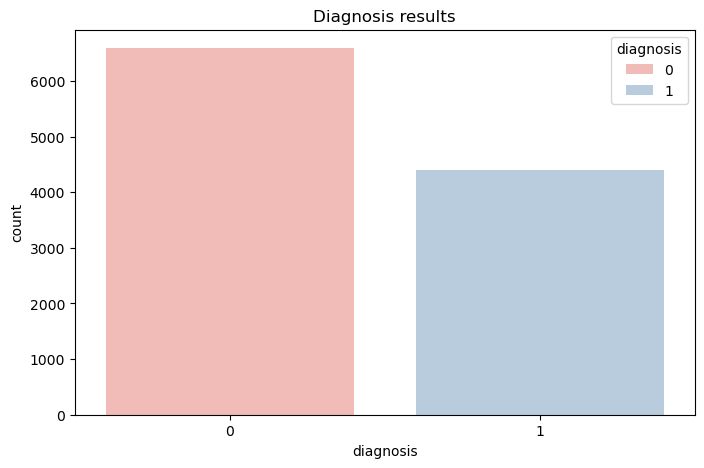

In [70]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="diagnosis", data = df, hue ="diagnosis", palette ="Pastel1")
plt.title("Diagnosis results")
plt.show()


## Visualize pairwise relationships between multiple features ( top 4 informative features).

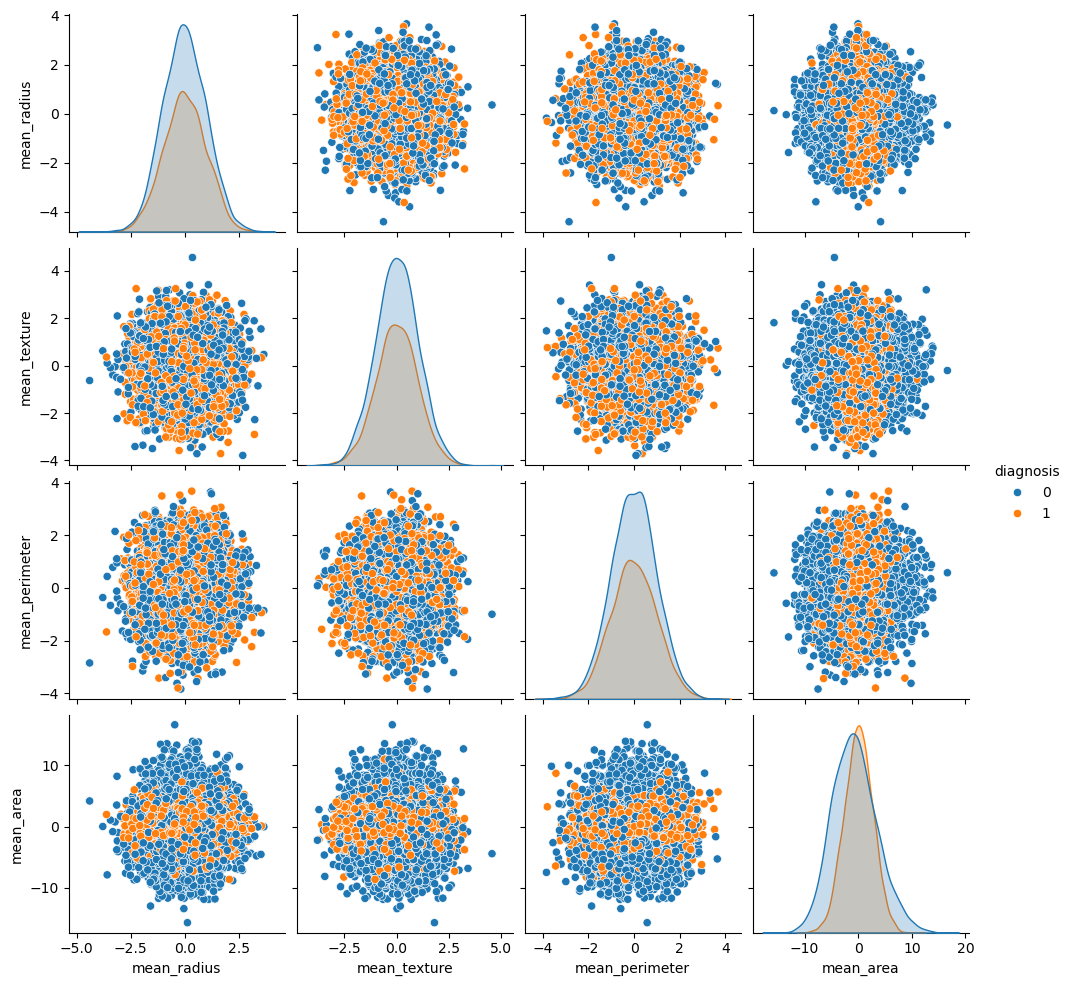

In [76]:
features_to_plot = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area']
sns.pairplot(df[features_to_plot + ['diagnosis']], hue='diagnosis')
plt.show()

In [95]:
x.shape

(11000, 30)

In [97]:
y.shape

(11000,)

## Checking the Skewness

In [101]:
col=x.select_dtypes(['int','float'])

In [103]:
col

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1.346009,0.762097,1.814917,3.044459,3.188300,1.668963,2.512714,-3.971836,-0.221033,1.626726,...,1.906447,1.236292,2.629122,-1.663193,-0.296061,-4.946258,-0.790670,2.138308,0.078932,-2.521396
1,-1.001879,-0.658901,-0.867818,2.724429,-2.887548,-1.433350,-2.558974,2.630906,0.831842,1.149070,...,0.320670,0.035325,1.526090,1.236800,-3.440604,3.874332,0.282501,0.269003,0.870939,2.269517
2,-1.030723,0.240743,-0.953795,-3.717261,1.711806,0.291977,0.579635,-3.014146,-0.150114,-0.360808,...,-0.882665,1.917824,-2.218128,-3.387880,1.149443,-2.718049,1.639728,0.340241,0.410500,-1.919519
3,0.341213,-0.335057,-0.446504,5.209697,0.424702,0.469633,-2.868001,0.602443,-0.138496,-0.408975,...,0.297126,1.283740,4.935191,4.536487,2.897155,-0.785938,-1.296861,0.051928,-0.418081,-0.382346
4,-0.874087,0.580217,-0.485929,-1.816818,0.515960,1.123454,-0.723034,-1.193299,0.860306,0.416944,...,2.089961,3.097443,-2.133194,-0.023331,-1.462209,0.272868,-0.132149,0.274037,0.940766,0.797135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,-0.477436,1.033889,0.296954,0.413668,1.701860,-1.385315,0.576230,-0.107546,0.067751,-0.671118,...,0.613125,0.090260,2.121688,2.420723,-0.095079,-2.565729,-1.573308,-1.363322,-0.560101,-1.624161
10996,0.592271,1.195604,-0.431499,-0.465664,1.013593,0.143925,2.754324,1.530670,1.738357,0.552381,...,-0.481926,-1.022622,0.437284,1.987956,-0.723635,-0.045209,1.186746,-1.902904,-0.663053,-1.639585
10997,0.426776,-0.651463,0.274899,0.364761,-1.262391,0.773674,-0.297676,0.520619,-0.335822,0.518671,...,0.257339,0.735989,-0.547382,-3.702439,-0.787956,0.343959,0.405636,0.026236,-0.675780,-2.563764
10998,3.094525,-0.363078,-2.233041,-0.339287,-1.727947,0.133088,1.158401,-0.540682,0.963487,0.593875,...,1.056852,0.346857,0.706889,-1.244373,-0.638197,-2.884349,-0.541318,-0.206337,-0.080111,-0.490587


In [107]:
from scipy.stats import skew

mean_radius
0.022096996141984095


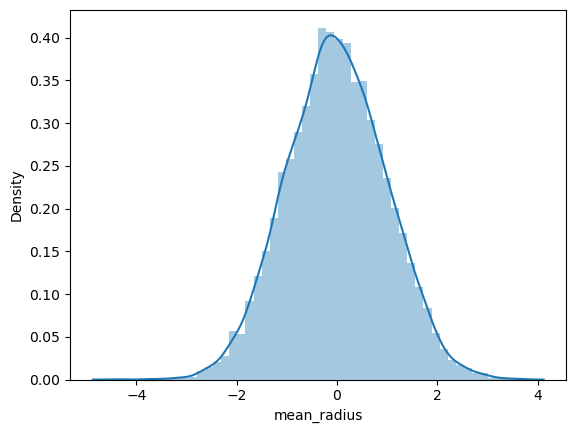

mean_texture
-0.03013062257051784


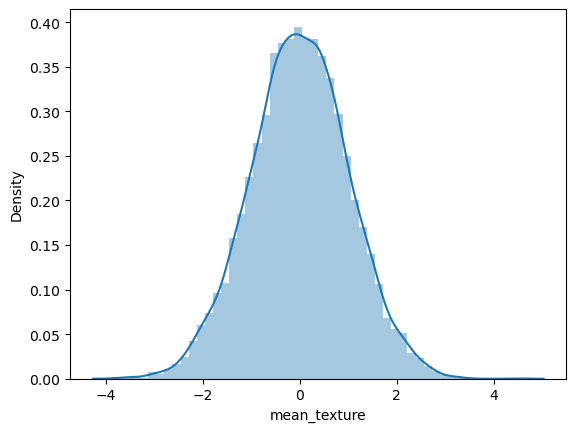

mean_perimeter
-0.00846314007227068


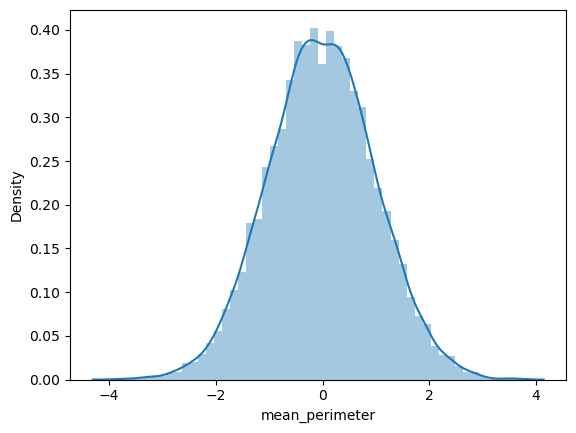

mean_area
0.13768120705627115


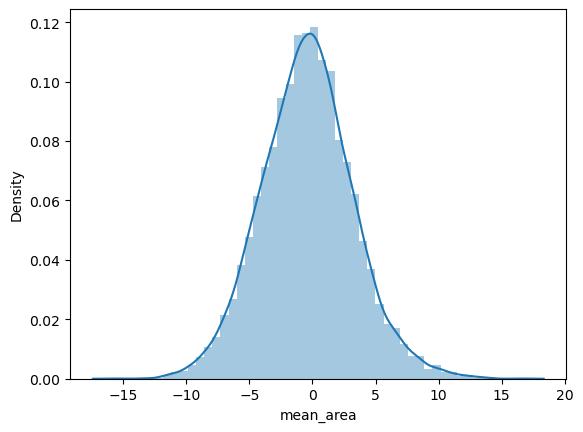

mean_smoothness
-0.05375945161682676


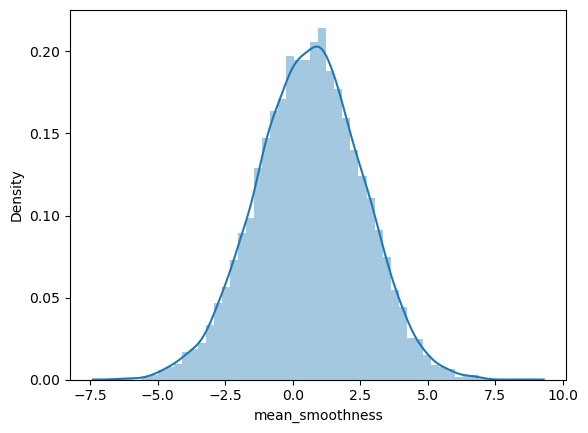

mean_compactness
0.01578190449551174


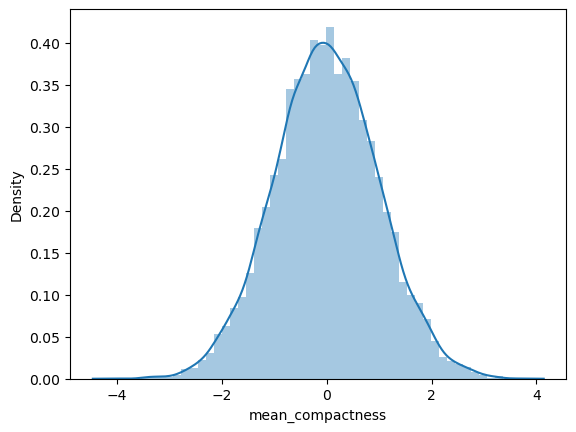

mean_concavity
-0.18412428762753033


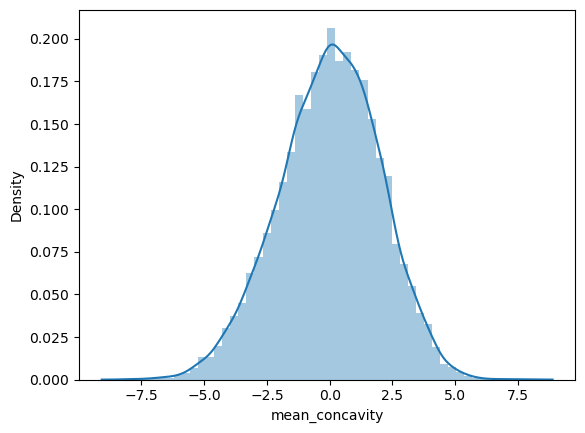

mean_concave_points
-0.29399213993176837


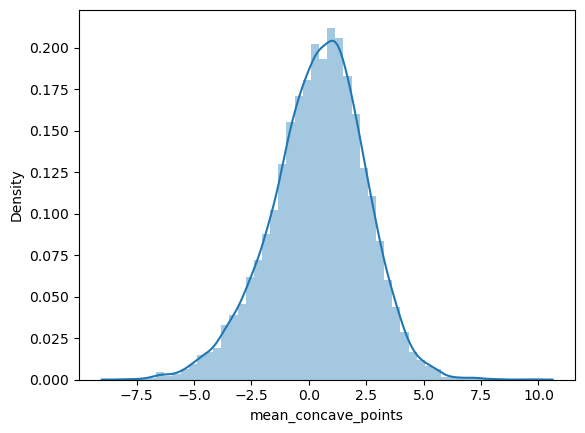

mean_symmetry
-0.03135253238272691


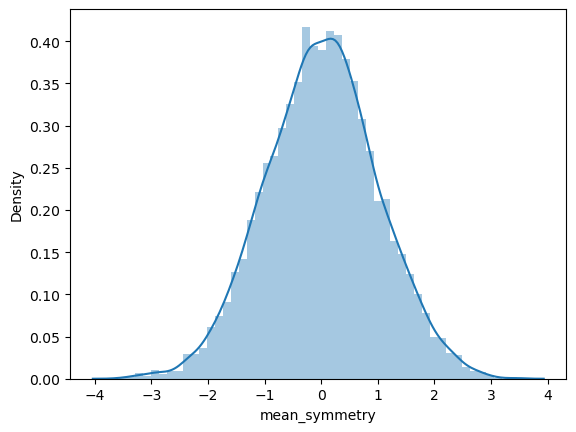

mean_fractal_dimension
-0.005466653302244226


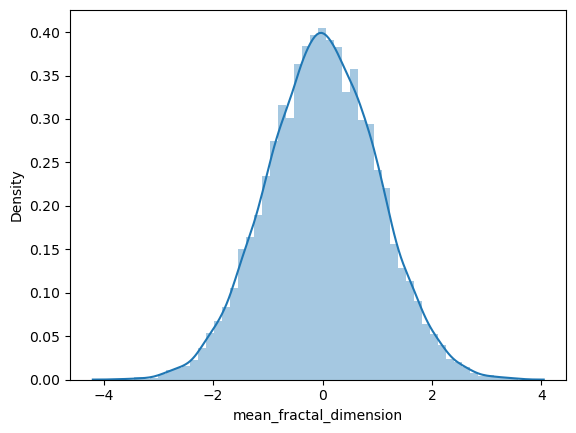

radius_error
0.013152289625101463


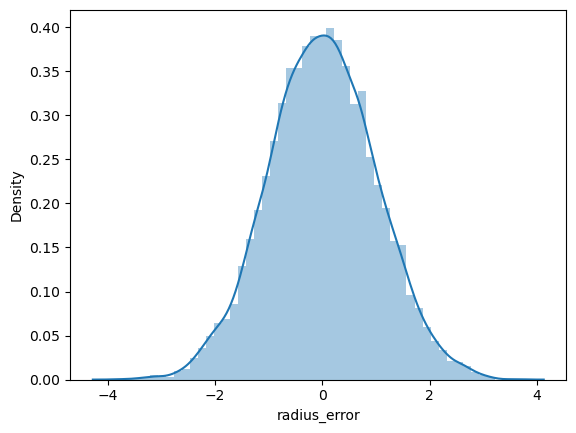

texture_error
0.06451434485634733


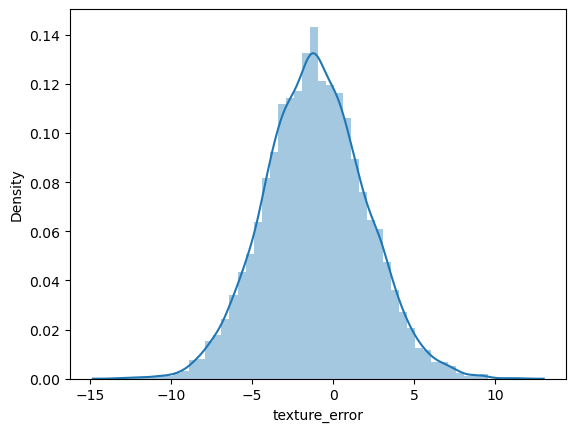

perimeter_error
0.2627213512934966


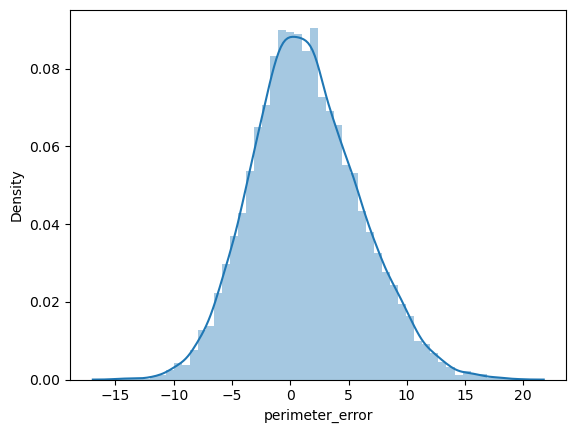

area_error
-0.03080960895132744


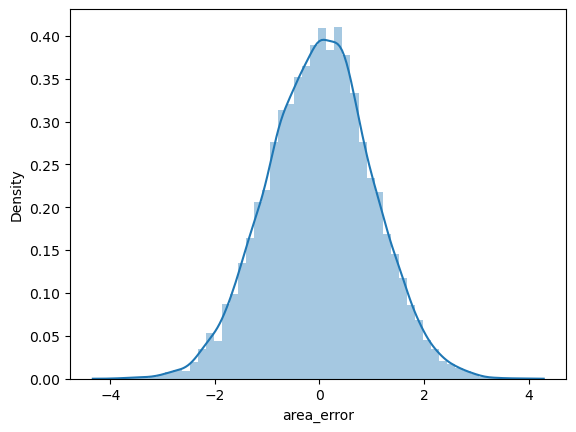

smoothness_error
0.10708429418257731


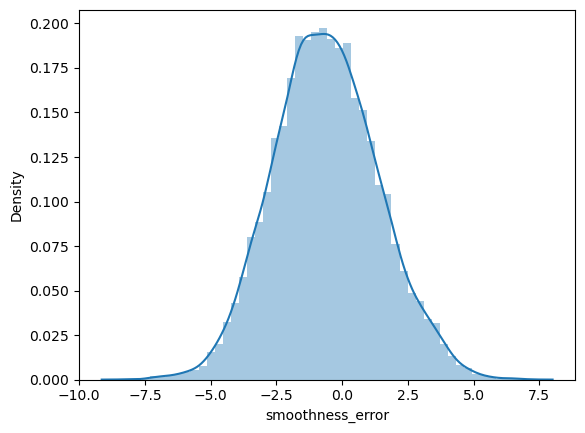

compactness_error
0.006754960926668204


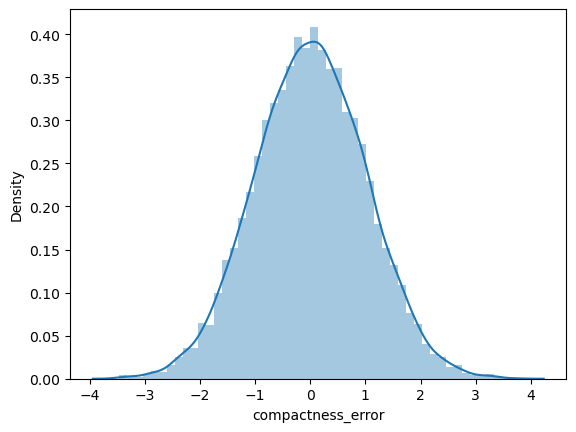

concavity_error
0.0788408932395729


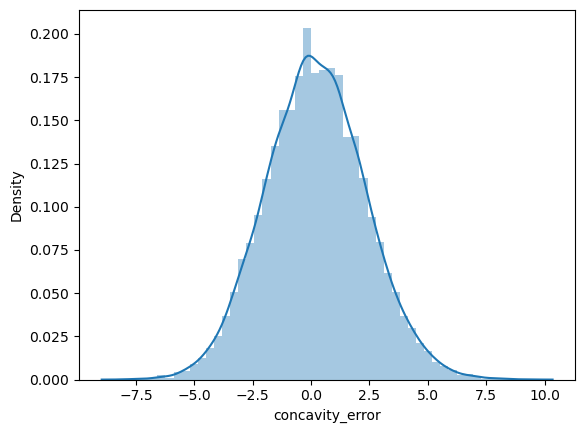

concave_points_error
0.011866912757550434


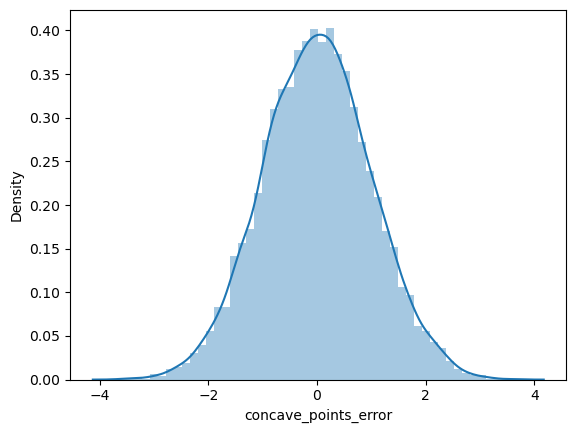

symmetry_error
0.18029883232687255


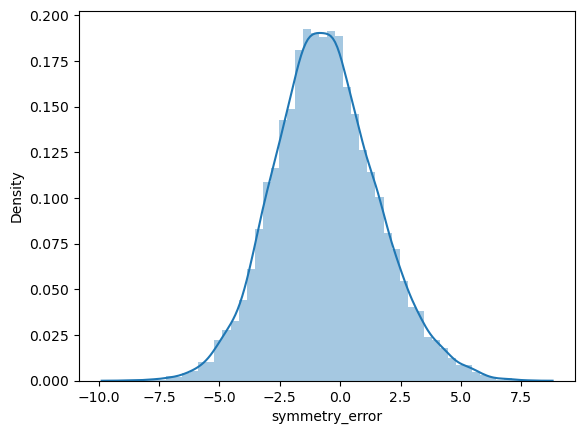

fractal_dimension_error
-0.016135843587197652


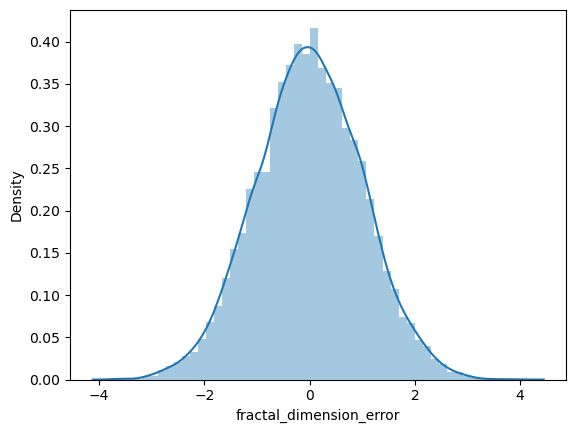

worst_radius
0.02192532135927997


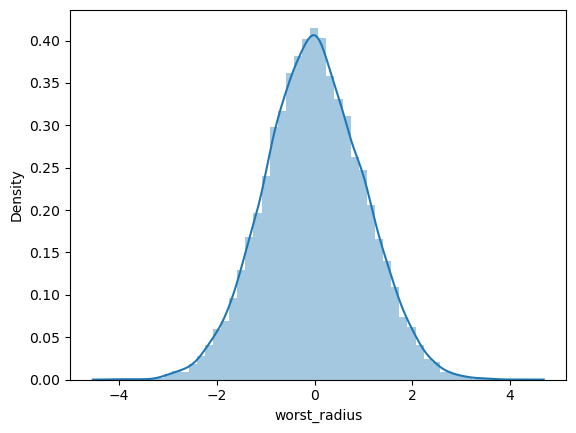

worst_texture
-0.0076025557946770945


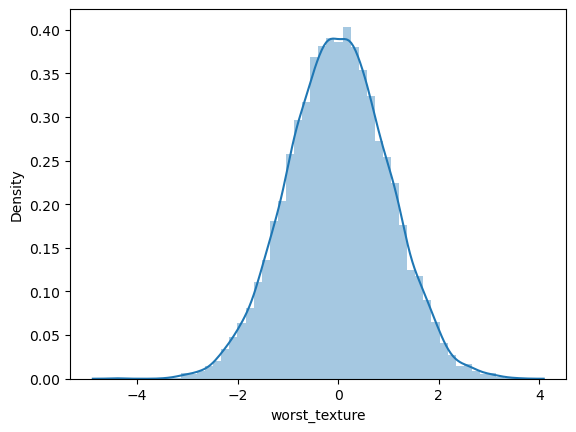

worst_perimeter
-0.1448011222164017


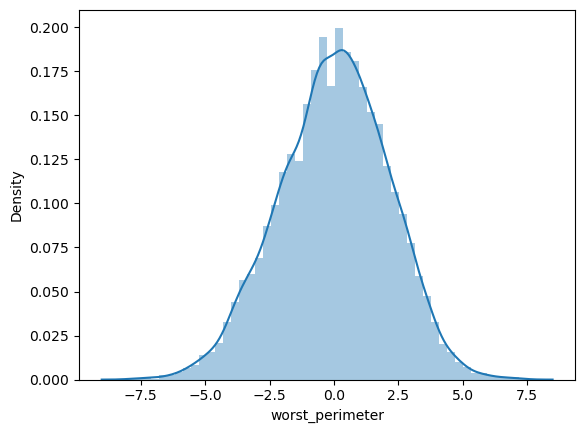

worst_area
-0.2529391956062464


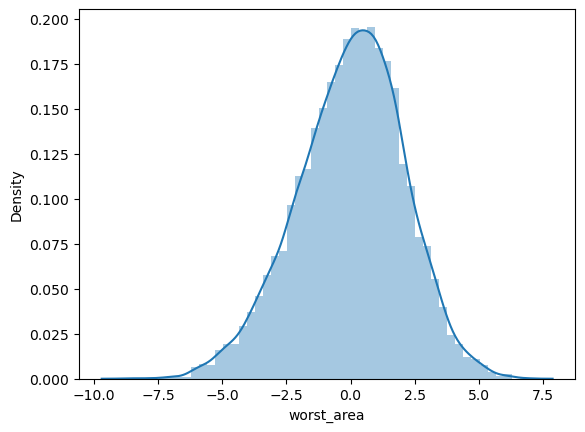

worst_smoothness
-0.21370918672450803


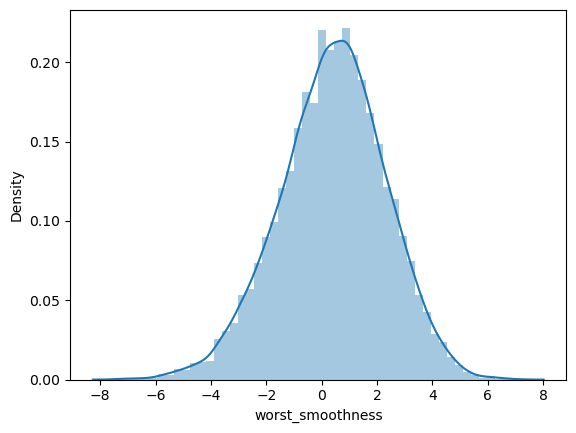

worst_compactness
0.3284171078393336


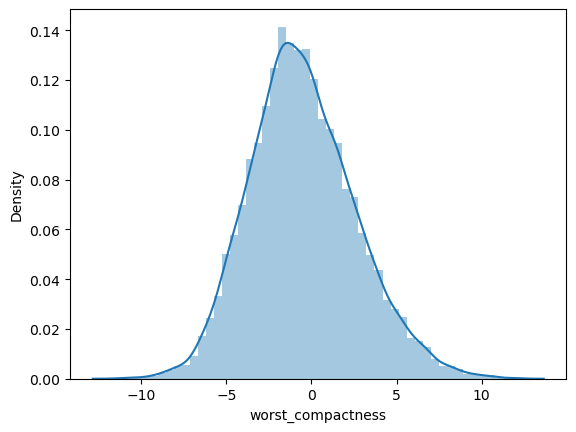

worst_concavity
0.005328706853397442


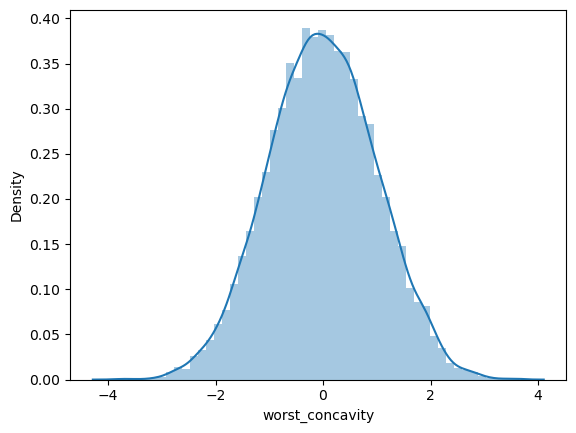

worst_concave_points
-0.0077016359655144


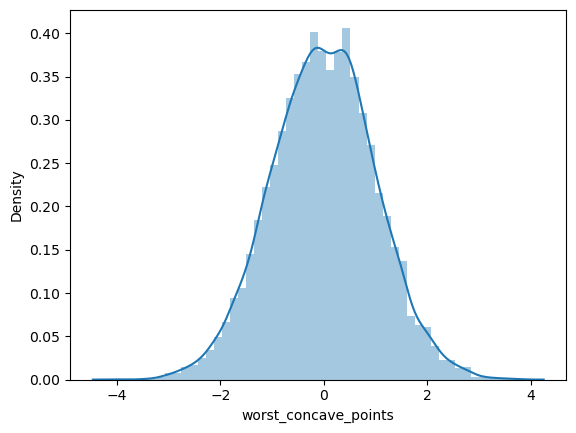

worst_symmetry
-0.03677508000698564


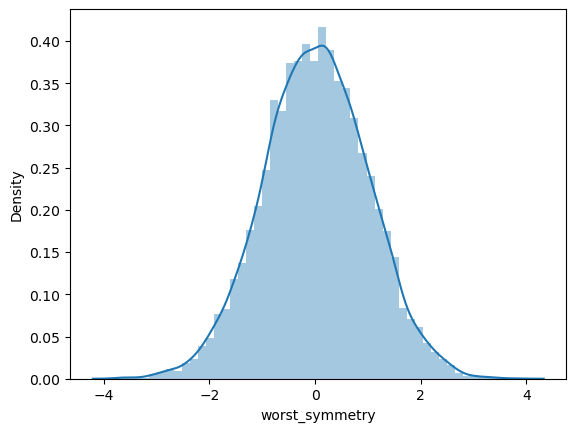

worst_fractal_dimension
-0.05695432137576757


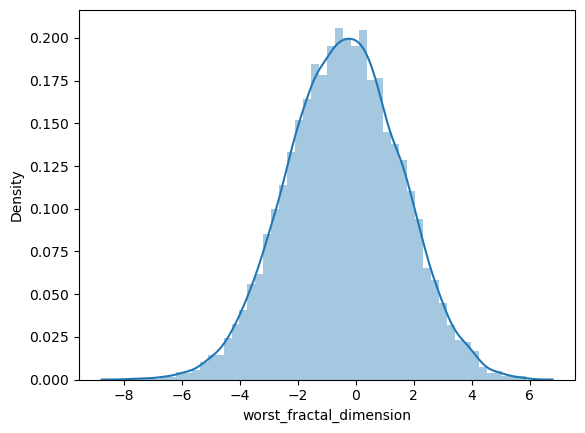

In [109]:
for i in col:
    print(i)
    print(skew(x[i]))
    plt.figure()
    sns.distplot(x[i])
    plt.show()

## Correlation between Feature and Target

In [99]:
pd.concat([x,y],axis=1).corr(numeric_only=True).style.background_gradient()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
mean_radius,1.000000,-0.002935,-0.009007,-0.005656,0.007162,-0.006245,0.012988,-0.004851,0.005746,0.001578,-0.002869,-0.001866,0.012312,0.017131,-0.005732,-0.007000,0.001729,0.000958,0.001743,0.003757,0.007605,-0.009619,-0.006919,0.000860,0.001355,-0.004720,-0.007873,0.012406,-0.010588,-0.001523,0.005416
mean_texture,-0.002935,1.000000,-0.005035,0.005995,0.004339,0.005500,0.002637,0.005876,0.012648,0.013935,-0.005203,0.003087,-0.009550,0.014565,0.004473,0.015448,0.001744,-0.005544,0.003233,0.003449,0.009269,-0.004733,0.011071,0.009617,-0.012978,0.003841,-0.007566,-0.006876,0.013578,0.004008,-0.008344
mean_perimeter,-0.009007,-0.005035,1.000000,0.017888,-0.006010,0.001842,-0.012741,0.006563,0.009085,0.006584,-0.003805,0.001807,-0.012099,0.002070,0.011206,-0.001925,-0.001250,0.011662,0.017222,-0.004563,-0.005964,-0.009046,-0.008752,0.004610,-0.012273,0.015524,0.001892,0.000057,-0.002420,-0.006084,-0.000399
mean_area,-0.005656,0.005995,0.017888,1.000000,-0.276592,0.004018,-0.377132,0.284386,-0.005027,-0.005365,0.007114,-0.039553,-0.380905,-0.009747,-0.271188,0.007620,-0.194965,0.002694,0.359379,0.001475,-0.013896,-0.009947,0.235030,0.543030,-0.302699,-0.126172,-0.000362,0.017540,-0.002565,-0.276256,0.095203
mean_smoothness,0.007162,0.004339,-0.006010,-0.276592,1.000000,-0.021572,0.223293,-0.050164,0.018359,-0.000875,-0.016857,-0.477862,0.356811,0.000997,-0.163157,0.005709,0.208782,0.008216,-0.121508,-0.002755,0.009482,0.002607,0.118982,0.196401,-0.062821,-0.179473,0.000226,-0.006662,0.004723,-0.073419,-0.257132
mean_compactness,-0.006245,0.005500,0.001842,0.004018,-0.021572,1.000000,-0.009270,-0.000270,0.007989,0.003064,0.000371,0.003444,-0.004171,0.001786,-0.000863,0.002731,-0.000581,-0.011594,0.001854,0.010712,0.000469,0.000137,-0.010254,-0.006302,0.007646,0.001404,-0.021948,-0.013444,-0.012131,0.003070,0.000941
mean_concavity,0.012988,0.002637,-0.012741,-0.377132,0.223293,-0.009270,1.000000,-0.274730,0.005214,0.004733,-0.000962,0.161656,0.510576,-0.000366,0.025522,0.018200,0.071379,-0.001561,0.161825,0.016860,-0.003599,0.007834,0.064164,-0.117267,0.070835,0.007499,-0.002139,-0.014076,0.014631,-0.192874,-0.009082
mean_concave_points,-0.004851,0.005876,0.006563,0.284386,-0.050164,-0.000270,-0.274730,1.000000,-0.002205,-0.014205,-0.004592,-0.088603,-0.531186,-0.013316,0.183700,0.011980,-0.182331,-0.000448,0.085799,0.002784,0.000788,-0.005386,0.232290,0.405694,-0.296990,0.521780,-0.002306,0.016568,-0.009666,0.130263,0.234074
mean_symmetry,0.005746,0.012648,0.009085,-0.005027,0.018359,0.007989,0.005214,-0.002205,1.000000,-0.010036,0.003571,-0.001338,0.012385,-0.001563,-0.015143,0.016559,-0.000005,0.018238,-0.021813,-0.007387,0.008600,0.012796,0.007777,0.007757,-0.005603,-0.021284,0.000695,0.002236,-0.011454,-0.002435,-0.009831
mean_fractal_dimension,0.001578,0.013935,0.006584,-0.005365,-0.000875,0.003064,0.004733,-0.014205,-0.010036,1.000000,0.005911,-0.000808,0.012613,-0.019481,0.001371,-0.011026,-0.001183,0.007699,0.008607,-0.004224,0.009219,-0.015879,-0.023626,0.000056,0.007944,-0.003456,-0.011091,-0.013817,-0.013176,0.000922,0.000999


## Splitting the data into training and testing

In [165]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [120]:
xtrain.shape

(8800, 30)

In [122]:
xtest.shape

(2200, 30)

## Feature Scaling

In [167]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [169]:
xtrain=sc.fit_transform(xtrain)

In [171]:
xtest=sc.fit_transform(xtest)

## 1- Predicting the data using Logistics Regression

In [173]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [175]:
# Evalutate the model
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.8336363636363636
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1308
           1       0.81      0.76      0.79       892

    accuracy                           0.83      2200
   macro avg       0.83      0.82      0.83      2200
weighted avg       0.83      0.83      0.83      2200



We have achieved an Average Accuracy of 83 % which is not that good. Lets see if we can increase this
accuracy by hyper tunin.g

In [178]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)


In [180]:
accuracy_score(ytest,ypred)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1308
           1       0.81      0.76      0.79       892

    accuracy                           0.83      2200
   macro avg       0.83      0.82      0.83      2200
weighted avg       0.83      0.83      0.83      2200



By using liblinear we get Accuracy of 83%

In [182]:
logreg=LogisticRegression(solver='newton-cg')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [184]:
accuracy_score(ytest,ypred)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1308
           1       0.81      0.76      0.79       892

    accuracy                           0.83      2200
   macro avg       0.83      0.82      0.83      2200
weighted avg       0.83      0.83      0.83      2200



## 2 - Predicting the data using KNN Classifier


In [222]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11) # by default n_neighbors = 5
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [224]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,ypred)
print(ac)

0.9036363636363637


By using KNN Classifier we get Accuracy of 90%

# 3 - Predicting the data using Decision Tree

In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [229]:
dt = DecisionTreeClassifier()

In [231]:
def mymodel(model):
 model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)
 print(accuracy_score(ytest,ypred))
 print(classification_report(ytest,ypred))

 return model

In [233]:
mymodel(dt)

0.8704545454545455
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1308
           1       0.85      0.83      0.84       892

    accuracy                           0.87      2200
   macro avg       0.87      0.86      0.87      2200
weighted avg       0.87      0.87      0.87      2200



DecisionTreeClassifier()

By using Decision Tree we get average accuracy of 87% which is good but lets check whether we get more
accurcy by hyper tunning
ploting decision tree

train score :1.0 
 test score : 0.8704545454545455


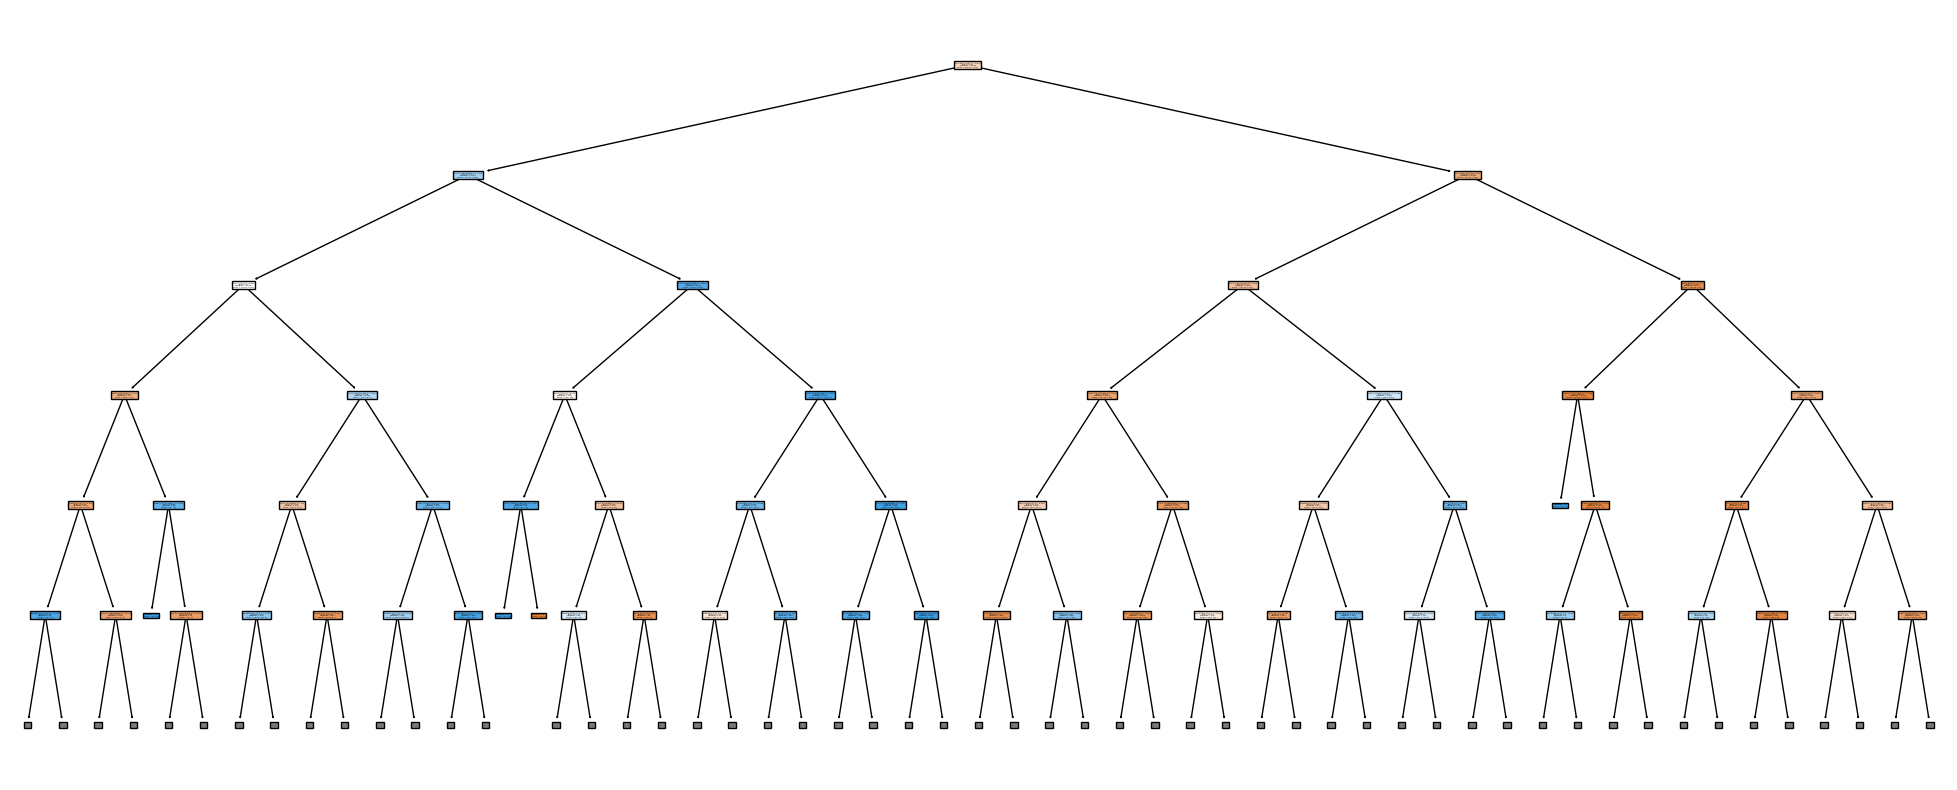

In [238]:
from sklearn import tree
fig,ax = plt.subplots(figsize = (25,10))
chart = tree.plot_tree(dt,max_depth = 5,feature_names = x.columns,filled = True )
plt.savefig("DecisionTree.jpg")
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0  test score : 0.870454545454545


 ttrain acc is high and test acc is low
low bias high varience
t

## Hyper Tunning the Decision Tree

## i - max_depth

In [242]:
for i in range(20,35):
 dt1 = DecisionTreeClassifier(max_depth = i)
 dt1.fit(xtrain,ytrain)
 ypred = dt1.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.8663636363636363
max_depth = 21 accuracy : 0.8709090909090909
max_depth = 22 accuracy : 0.8690909090909091
max_depth = 23 accuracy : 0.8681818181818182
max_depth = 24 accuracy : 0.8722727272727273
max_depth = 25 accuracy : 0.8722727272727273
max_depth = 26 accuracy : 0.8681818181818182
max_depth = 27 accuracy : 0.8709090909090909
max_depth = 28 accuracy : 0.8681818181818182
max_depth = 29 accuracy : 0.8690909090909091
max_depth = 30 accuracy : 0.8709090909090909
max_depth = 31 accuracy : 0.8713636363636363
max_depth = 32 accuracy : 0.8686363636363637
max_depth = 33 accuracy : 0.8713636363636363
max_depth = 34 accuracy : 0.87


In [261]:
dt2 = DecisionTreeClassifier(max_depth = 25)
mymodel(dt2)

0.8727272727272727
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1308
           1       0.85      0.83      0.84       892

    accuracy                           0.87      2200
   macro avg       0.87      0.87      0.87      2200
weighted avg       0.87      0.87      0.87      2200



DecisionTreeClassifier(max_depth=25)

In [263]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 0.8727272727272727


## ii - min_samples_split

In [265]:
for i in range(90,110):
 dt3 = DecisionTreeClassifier(min_samples_split = i)
 dt3.fit(xtrain,ytrain)
 ypred = dt3.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 90 accuracy : 0.8654545454545455
max_depth = 91 accuracy : 0.8654545454545455
max_depth = 92 accuracy : 0.8645454545454545
max_depth = 93 accuracy : 0.865
max_depth = 94 accuracy : 0.8645454545454545
max_depth = 95 accuracy : 0.8663636363636363
max_depth = 96 accuracy : 0.8654545454545455
max_depth = 97 accuracy : 0.8654545454545455
max_depth = 98 accuracy : 0.865909090909091
max_depth = 99 accuracy : 0.8677272727272727
max_depth = 100 accuracy : 0.865909090909091
max_depth = 101 accuracy : 0.8663636363636363
max_depth = 102 accuracy : 0.8677272727272727
max_depth = 103 accuracy : 0.8686363636363637
max_depth = 104 accuracy : 0.8686363636363637
max_depth = 105 accuracy : 0.8654545454545455
max_depth = 106 accuracy : 0.8663636363636363
max_depth = 107 accuracy : 0.8686363636363637
max_depth = 108 accuracy : 0.865909090909091
max_depth = 109 accuracy : 0.865


In [267]:
dt4 = DecisionTreeClassifier(min_samples_split = 92)
mymodel(dt4)


0.865909090909091
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1308
           1       0.84      0.83      0.83       892

    accuracy                           0.87      2200
   macro avg       0.86      0.86      0.86      2200
weighted avg       0.87      0.87      0.87      2200



DecisionTreeClassifier(min_samples_split=92)

In [269]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")


train score :0.9095454545454545 
 test score : 0.865909090909091


## iii - min_samples_leaf

In [272]:
for i in range(30,50):
 dt5 = DecisionTreeClassifier(min_samples_leaf = i)
 dt5.fit(xtrain,ytrain)
 ypred = dt5.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 30 accuracy : 0.8772727272727273
max_depth = 31 accuracy : 0.8777272727272727
max_depth = 32 accuracy : 0.88
max_depth = 33 accuracy : 0.88
max_depth = 34 accuracy : 0.8763636363636363
max_depth = 35 accuracy : 0.8777272727272727
max_depth = 36 accuracy : 0.8809090909090909
max_depth = 37 accuracy : 0.8736363636363637
max_depth = 38 accuracy : 0.8722727272727273
max_depth = 39 accuracy : 0.8722727272727273
max_depth = 40 accuracy : 0.8677272727272727
max_depth = 41 accuracy : 0.8713636363636363
max_depth = 42 accuracy : 0.87
max_depth = 43 accuracy : 0.8704545454545455
max_depth = 44 accuracy : 0.8686363636363637
max_depth = 45 accuracy : 0.8686363636363637
max_depth = 46 accuracy : 0.8681818181818182
max_depth = 47 accuracy : 0.8677272727272727
max_depth = 48 accuracy : 0.865909090909091
max_depth = 49 accuracy : 0.8654545454545455


In [274]:
dt6 = DecisionTreeClassifier(min_samples_leaf = 44)
mymodel(dt6)

0.8686363636363637
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1308
           1       0.84      0.83      0.84       892

    accuracy                           0.87      2200
   macro avg       0.86      0.86      0.86      2200
weighted avg       0.87      0.87      0.87      2200



DecisionTreeClassifier(min_samples_leaf=44)

## 4 - Predicting the data using Random Forest

In [277]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1308
           1       0.95      0.91      0.93       892

    accuracy                           0.94      2200
   macro avg       0.94      0.94      0.94      2200
weighted avg       0.94      0.94      0.94      2200



## . Predicting the data using Ensemble Learning¶

## 5. Predicting the data using Boosting

## i - Adaboost Classifier

In [283]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1308
           1       0.82      0.78      0.80       892

    accuracy                           0.84      2200
   macro avg       0.84      0.83      0.83      2200
weighted avg       0.84      0.84      0.84      2200



## ii - Gradient Boosting

In [286]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1308
           1       0.93      0.87      0.90       892

    accuracy                           0.92      2200
   macro avg       0.92      0.91      0.92      2200
weighted avg       0.92      0.92      0.92      2200



## iii - XG Boosting

In [289]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 2.0 MB/s eta 0:01:03
   ---------------------------------------- 0.5/124.9 MB 6.2 MB/s eta 0:00:21
   ---------------------------------------- 1.0/124.9 MB 8.0 MB/s eta 0:00:16
   ---------------------------------------- 1.5/124.9 MB 9.7 MB/s eta 0:00:13
    --------------------------------------- 2.0/124.9 MB 9.6 MB/s eta 0:00:13
    --------------------------------------- 2.6/124.9 MB 10.2 MB/s eta 0:00:12
    --------------------------------------- 3.1/124.9 MB 10.3 MB/s eta 0:00:12
   - -------------------------------------- 3.7/124.9 MB 10.2 MB/s eta 0:00:12
   - -------------------------------------- 4.2/124.9 MB 10.7 MB/s eta 0:00:12
   - -------------------------------------- 4.6/124.9 MB 10.0 MB/s eta 0:00:12
   - -------------------------------------- 5.2/124.9 MB 10.7 MB/s eta 0:00:12
   - -------------------------------------- 5.6/124.9 MB 10.6 MB/

In [290]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1308
           1       0.95      0.94      0.95       892

    accuracy                           0.96      2200
   macro avg       0.96      0.96      0.96      2200
weighted avg       0.96      0.96      0.96      2200



## i - Bagging

In [307]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1308
           1       0.82      0.76      0.79       892

    accuracy                           0.83      2200
   macro avg       0.83      0.82      0.83      2200
weighted avg       0.83      0.83      0.83      2200



In [309]:
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1308
           1       0.94      0.88      0.91       892

    accuracy                           0.93      2200
   macro avg       0.93      0.92      0.92      2200
weighted avg       0.93      0.93      0.93      2200



In [313]:
models =[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))

In [315]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models) # estimators --> model name
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1308
           1       0.92      0.68      0.79       892

    accuracy                           0.85      2200
   macro avg       0.87      0.82      0.83      2200
weighted avg       0.86      0.85      0.84      2200



In [317]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models,voting='soft') # estimators --> model na
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1308
           1       0.84      0.83      0.84       892

    accuracy                           0.87      2200
   macro avg       0.86      0.86      0.86      2200
weighted avg       0.87      0.87      0.87      2200



# Conclusion
# Based on the above accuracy scores, we should go ahead with Random forest or Exstream gradient boosting (XGBoost).